### Introduction

The dataset contains physical built information about Penguins.

It consists of 5 columns

culmen_length_mm: culmen length (mm)

culmen_depth_mm: culmen depth (mm)

flipper_length_mm: flipper length (mm)

body_mass_g: body mass (g)

sex: penguin sex

### Loading Packages

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns

In [19]:
from matplotlib import pyplot as plt

In [93]:
from sklearn.metrics import silhouette_score

### Load dataset

In [20]:
data = pd.read_csv("/content/drive/MyDrive/DS Course Uploads/Datasets/penguins.csv")

In [21]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


### Summarising data

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [23]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [24]:
data[(data.iloc[:, :-1] < 0).any(axis=1)]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,-132.0,4400.0,MALE


In [25]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [26]:
data.sex.value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [27]:
data[data.sex == '.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [28]:
df = data[data.isnull().any(axis=1) | ~data.sex.isin(["MALE", "FEMALE"]) | (data.iloc[:, :-1] < 0).any(axis=1)]

In [29]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
14,34.6,21.1,-132.0,4400.0,MALE
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN
336,44.5,15.7,217.0,4875.0,.


In [30]:
data.iloc[[3,339], :]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN


In [31]:
data.duplicated().any()

True

### Perform EDA

In [32]:
data.drop([3,339], inplace=True)

In [33]:
data.shape

(342, 5)

In [34]:
df = data[data.isnull().any(axis=1) | ~data.sex.isin(["MALE", "FEMALE"]) | (data.iloc[:, :-1] < 0).any(axis=1)]

In [35]:
diff = data.drop(df.index)

In [36]:
diff.shape

(333, 5)

In [37]:
data.at[14,'flipper_length_mm'] = diff.flipper_length_mm.mean()

In [38]:
data.loc[14]

culmen_length_mm           34.6
culmen_depth_mm            21.1
flipper_length_mm    215.387387
body_mass_g              4400.0
sex                        MALE
Name: 14, dtype: object

In [39]:
data['sex'] = data.sex.map({"MALE": 0, "FEMALE": 1})

In [40]:
data.reset_index(inplace=True)

In [41]:
data.drop("index", inplace=True, axis=1)

In [42]:
data.sex = data['sex'].fillna(0)

In [43]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Standardize data

In [44]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.88449874,  0.78544923, -0.13113762, -0.56414208, -0.9655068 ],
       [-0.81112573,  0.1261879 , -0.11186988, -0.50170305,  1.03572548],
       [-0.66437972,  0.43046236, -0.07718797, -1.18853234,  1.03572548],
       ...,
       [ 1.18828874, -0.73592307,  0.02685778,  1.93341896, -0.9655068 ],
       [ 0.23443963, -1.19233476, -0.01167768,  1.24658968,  1.03572548],
       [ 1.09657248, -0.53307343, -0.00782413,  1.49634578, -0.9655068 ]])

### Modelling

In [ ]:
model = DBSCAN()
max_score = silhouette_score(scaled_data, model.fit_predict(scaled_data))
print(max_score)

for i in np.arange(0.05, 1.0, 0.05):
  model2 = DBSCAN(eps=i, min_samples=6, metric="euclidean")
  labels = model2.fit_predict(scaled_data)
  if len(set(labels)) > 1:
    sil_score=silhouette_score(scaled_data, labels)
    max_score = max(max_score, sil_score)
    print(i, max_score)

print(max_score)

In [75]:
# best silhoutte score is on (0.7, 6)
model = DBSCAN(0.7, min_samples=6)

In [76]:
cluster_new = model.fit(scaled_data)

In [77]:
data['cluster'] = cluster_new.labels_

In [78]:
data.cluster.value_counts()

cluster
 1    104
 0     73
 4     61
 3     58
 2     31
-1     15
Name: count, dtype: int64

### Visualization

In [79]:
input_x = data.iloc[:,:-1].values

In [80]:
output_y = data.iloc[:,-1].values

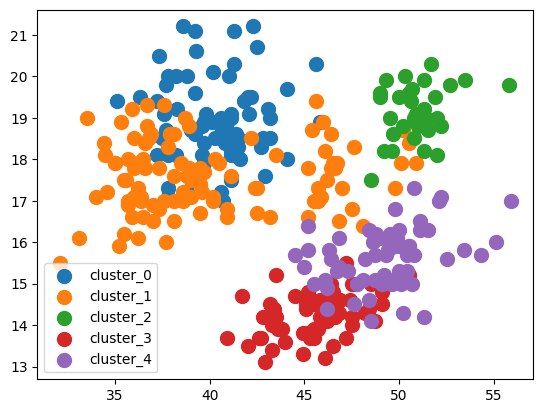

In [94]:
plt.scatter(input_x[output_y==0,0],input_x[output_y==0,1],s=100, label='cluster_0')
plt.scatter(input_x[output_y==1,0],input_x[output_y==1,1],s=100, label='cluster_1')
plt.scatter(input_x[output_y==2,0],input_x[output_y==2,1],s=100, label='cluster_2')
plt.scatter(input_x[output_y==3,0],input_x[output_y==3,1],s=100, label='cluster_3')
plt.scatter(input_x[output_y==4,0],input_x[output_y==4,1],s=100, label='cluster_4')
plt.legend()
plt.show()

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                342 non-null    float64
 5   cluster            342 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.2 KB


<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

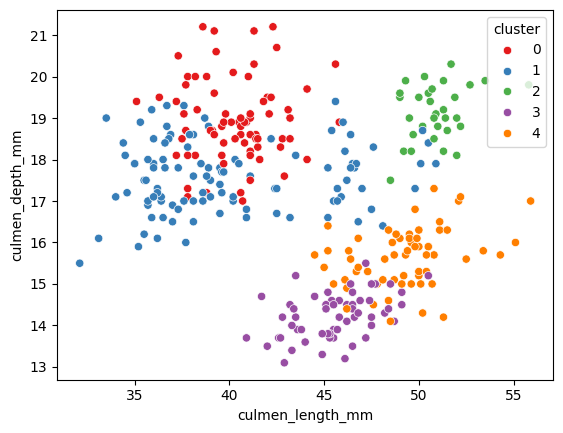

In [83]:
sns.scatterplot(data[data.cluster != -1], x="culmen_length_mm", y="culmen_depth_mm", hue="cluster", palette="Set1")

<Axes: xlabel='culmen_depth_mm', ylabel='flipper_length_mm'>

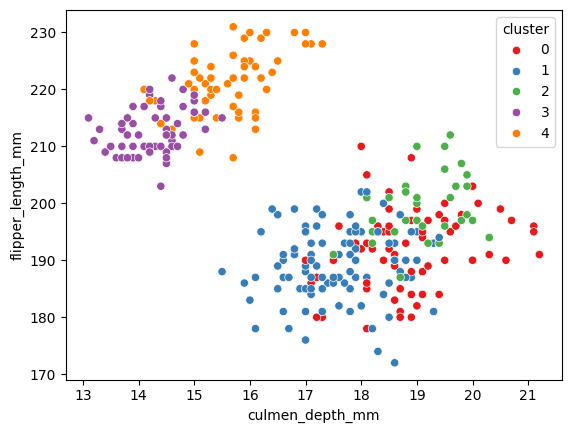

In [84]:
sns.scatterplot(data[data.cluster != -1], x="culmen_depth_mm", y="flipper_length_mm", hue="cluster", palette="Set1")

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

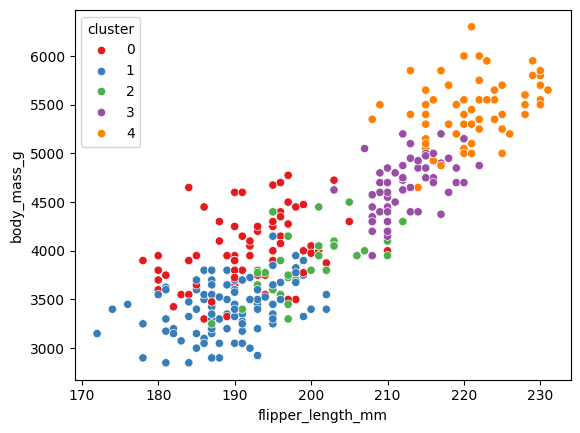

In [85]:
sns.scatterplot(data[data.cluster != -1], x="flipper_length_mm", y="body_mass_g", hue="cluster", palette="Set1")

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

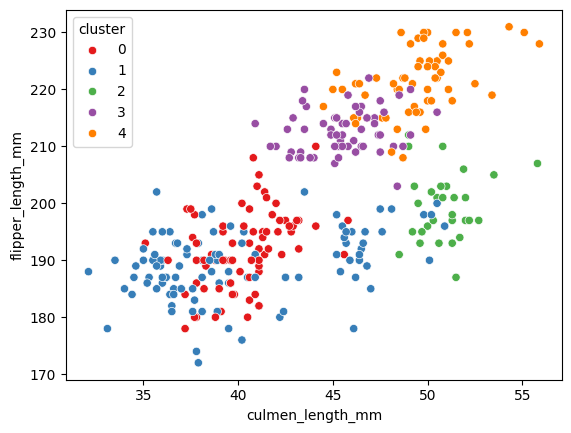

In [86]:
sns.scatterplot(data[data.cluster != -1], x="culmen_length_mm", y="flipper_length_mm", hue="cluster", palette="Set1")

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

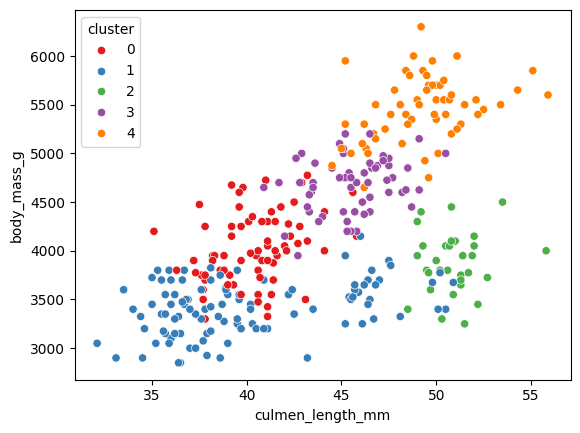

In [87]:
sns.scatterplot(data[data.cluster != -1], x="culmen_length_mm", y="body_mass_g", hue="cluster", palette="Set1")

<Axes: xlabel='culmen_depth_mm', ylabel='body_mass_g'>

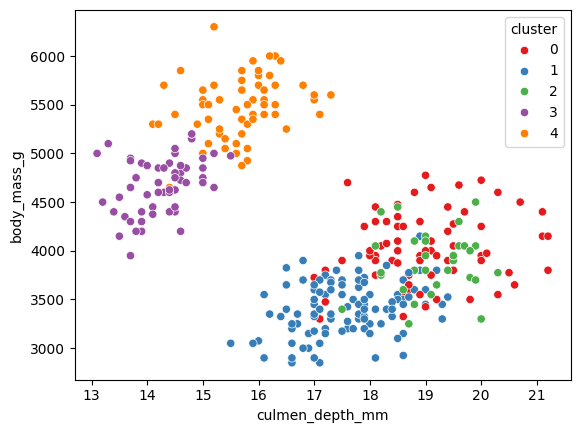

In [88]:
sns.scatterplot(data[data.cluster != -1], x="culmen_depth_mm", y="body_mass_g", hue="cluster", palette="Set1")

<Axes: xlabel='sex', ylabel='body_mass_g'>

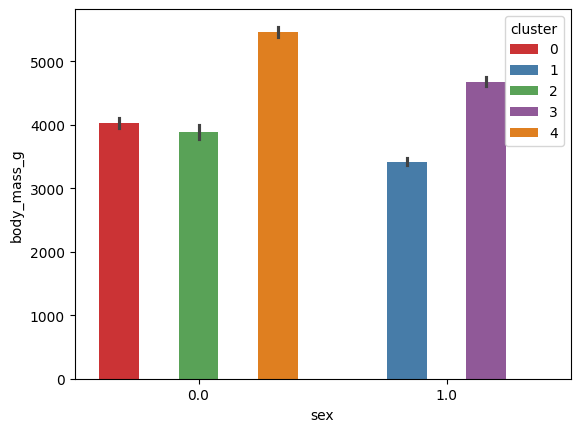

In [89]:
sns.barplot(data[data.cluster != -1], x="sex", y="body_mass_g", hue="cluster", palette="Set1")

<Axes: xlabel='sex', ylabel='culmen_depth_mm'>

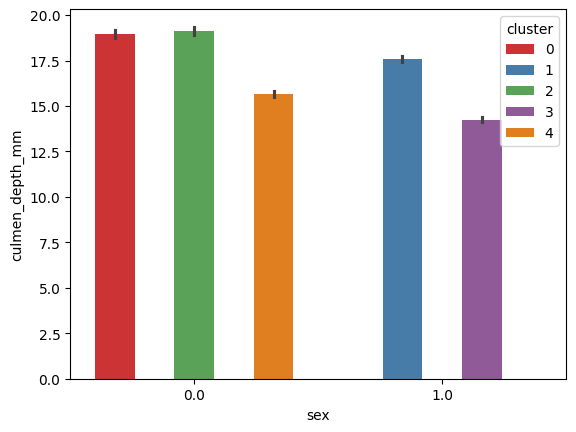

In [90]:
sns.barplot(data[data.cluster != -1], x="sex", y="culmen_depth_mm", hue="cluster", palette="Set1")

<Axes: xlabel='sex', ylabel='culmen_length_mm'>

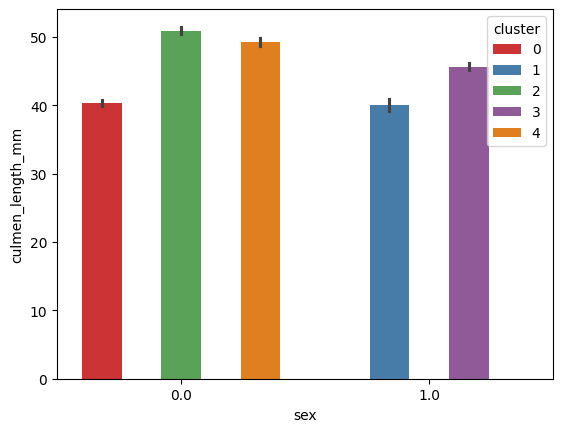

In [91]:
sns.barplot(data[data.cluster != -1], x="sex", y="culmen_length_mm", hue="cluster", palette="Set1")

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

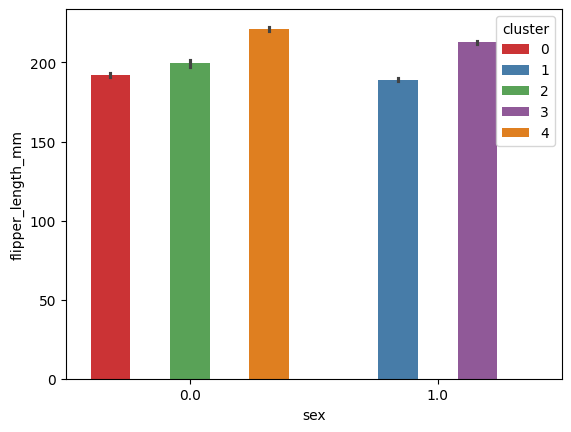

In [92]:
sns.barplot(data[data.cluster != -1], x="sex", y="flipper_length_mm", hue="cluster", palette="Set1")

### Summary

Cluster 0,2,4 are all Male penguins

Cluster 1,3 - Female penguins

0,1 typically contribute to smaller penguins(kids)
2,3,4 - bigger penguins(adults)
